# Exploratory Data Analysis 

We will analyze the transaction data to engineer features. We will try to answer a few questions using figures and tables enabling design of features, the fraud detection model, or the overall system.

In [1]:
!pip install pandas 
!pip install numpy 
!pip install scikit-learn 
!pip install basemap

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

from IPython.display import display, HTML

# Display Properties
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


sns.set(style="ticks", color_codes=True)

### Data Load

Let's load the fraud data set first

In [3]:
df = pd.read_csv('/workspace/shared-data/transactions-1.csv')

## Format and Type

The format of the file is CSV and below we see the various attributes and their data types as well take a sneak preview for the data

In [4]:
## format and type
print(df.dtypes)

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
sex                       object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0


## Feature Statistics

Determine the dynamics of each feature (int/float - math stats, text - categorical or not). We have <b>11</b> numeric columns out of which <b>is_fraud</b> is our target variable and so not a feature. So in effect we have 10 numeric features and 12 textual or categorical features

In [6]:
# We will first get the statistics of all the numeric columns
math_stats = df.describe() 
display(math_stats)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000
mean,926196.500,417386038393710400.000,70.064,48813.258,38.539,-90.228,88643.675,1358674218.834,38.539,-90.228,0.005
std,534740.232,1309115265318734848.000,159.254,26881.846,5.071,13.748,301487.618,18195081.388,5.106,13.760,0.072
min,0.000,60416207185.000,1.000,1257.000,20.027,-165.672,23.000,1325376018.000,19.027,-166.672,0.000
25%,463098.250,180042946491150.000,9.640,26237.000,34.669,-96.798,741.000,1343016823.750,34.740,-96.899,0.000
50%,926196.500,3521417320836166.000,47.450,48174.000,39.354,-87.477,2443.000,1357089331.000,39.369,-87.441,0.000
75%,1389294.750,4642255475285942.000,83.100,72042.000,41.940,-80.158,20328.000,1374581485.250,41.956,-80.245,0.000
max,1852393.000,4992346398065154048.000,28948.900,99921.000,66.693,-67.950,2906700.000,1388534374.000,67.510,-66.951,1.000


In [7]:
# We will first get the statistics of all the categorical columns
cat_stats = df.describe(include=[object])
display(cat_stats)

,trans_date_trans_time,merchant,category,first,last,sex,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


In [8]:
# Let's get some unique values for some of the numeric attributes
unique_cc_num = df['cc_num'].nunique() 

# This is to see if the combination of merchant latitude longitude add up to the merchant
df["merchant_loc"] = df["merch_lat"].astype(str) + df["merch_long"].astype(str)
unique_merchant_lat_long = df['merchant_loc'].nunique() 

# This is to see if the combination of person latitude longitude add up to a person
df["person_loc"] = df["lat"].astype(str) + df["long"].astype(str)
unique_person_lat_long = df['person_loc'].nunique() 

# This is to see if we can find unique individuals using first, last, sex and date of birth
df["person"] = df["dob"].astype(str) + df["first"] + df["last"] + df["sex"] + df["job"]
unique_person = df['person'].nunique() 

# This is to get unique addresses since fraudulent transactions could be occurring from a particular address
df["address"] = df["street"] + df["city"] + df["state"] + df["zip"].astype(str)
unique_addresses = df['address'].nunique()

# Get Unique States
unique_states = df['state'].nunique()

# Get Unique Categories
unique_categories = df['category'].unique()

# Get Unique Job
unique_jobs = df['job'].nunique()

In [9]:
unique_stats = np.column_stack((unique_person, unique_cc_num, unique_addresses, 
                               unique_person_lat_long, unique_merchant_lat_long , unique_states, unique_jobs))
unique_stats_df = pd.DataFrame(unique_stats, columns = ['Unique Customers','Unique Customer Ids',
                                                        'Unique Addresses', 'Unique Customer Lat/Long',
                                                        'Unique Merchant Lat/Long','Unique States', 'Unique Jobs'])
display(HTML(unique_stats_df.to_html()))  

,Unique Customers,Unique Customer Ids,Unique Addresses,Unique Customer Lat/Long,Unique Merchant Lat/Long,Unique States,Unique Jobs
0,999,999,999,985,1852394,51,497


From the above we can conclude that there are 999 unique individuals residing at a particular address since there are also 999 addresses. Including all these 3 features might not help us in improving the accuracy of any model. So we want to eliminate some of these features

## Clean up

We will clean up the data to cover the following 

* Find and List number of blank entries and outliers/errors
* Take corrective actions and provide justification
* Remove unnecessary features
* Derive new features

In [10]:
# First let's copy the dataframe to keep a backup
df_bak = df.copy(deep=True)

# Then let's look at missing values 
print(df.isna().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
sex                      0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
merchant_loc             0
person_loc               0
person                   0
address                  0
dtype: int64


In [11]:
# Check if all the Date of birth values are valid dates 
all_dates_valid = pd.to_datetime(df['dob'], format='%Y-%m-%d', errors='coerce').notnull().all()

# Check that there are no illogical dates 
dob_year_values = pd.to_datetime(df['dob'], format='%Y-%m-%d', errors='coerce').dt.year.values
is_valid_year =  np.any((dob_year_values < 2019)|(dob_year_values > 1920 ))

dob_stats = np.column_stack((all_dates_valid, is_valid_year ))
dob_stats_df = pd.DataFrame(dob_stats, columns = ['Valid DOB?','Valid Year in DOB?'])
display(HTML(dob_stats_df.to_html()))  

,Valid DOB?,Valid Year in DOB?
0,True,True


If you see the above this dataset does not have any missing values. So we don't have any corrective action to take. So now let's see if we can reduce some of the features. We already can remove the following duplicate features since the information is available in some other attributes or we know the attribute is some sort of sequence generator having high cardinality that is not going to influence whether a transaction is a fraudulent one or not

<ul>
    <li>
         <b>first unnamed col: </b> This is just a sequence number for the data rows and so can be removed
    </li>
     <li>
        <b>trans_date_trans_time: </b> This is just a timestamp and is <b>duplicate</b> to <b>unix_time</b>. Also the latter is numeric be easier to use
    </li>
     <li>
        <b>trans_num: </b> This is just sequence or unique generated identifier assigned to every transaction
     </li>  
</ul>

We will instead derive the following features

<ol>
    <li>
        <b>Age:</b> Age from the Date of birth
    </li>
    <li>
        <b>Day of the Week:</b> Day of the week for the transaction derived from Transaction Date
    </li>
    <li>
        <b>Time of the Day:</b> Time of the Day for the transaction derived from Transaction Date
    </li>
    <li>
        <b>Month:</b> Month for the transaction derived from Transaction Date
    </li>
</ol>

In [12]:
from datetime import datetime, date 

# Let's convert transaction date and time and dob to date-time
df["dob_dt"] = pd.to_datetime(df['dob'], format='%Y-%m-%d', errors='coerce')
df["txn_dt"] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Compute weekday from transaction date
df['txn_weekday'] = df['txn_dt'].dt.day_name()

# This function converts given date to age 
def age(born): 
    born = datetime.strptime(born, "%Y-%m-%d").date() 
    today = date.today() 
    return today.year - born.year - ((today.month,  today.day) < (born.month,  born.day)) 

# Compute age from date of birth 
df['age'] = df['dob'].apply(age) 

# Compute hour from transaction date
df['txn_hour'] = df['txn_dt'].dt.hour

# Slot the times into well known time ranges
time_ranges = [0,4,8,12,16,21,24]
part_of_day_dict = ['Late Night', 'Early Morning','Morning','Afternoon','Evening','Night']
df['part_of_day'] = pd.cut(df['txn_hour'], bins=time_ranges, labels=part_of_day_dict, include_lowest=True)

# Compute month from transaction date
df['txn_month'] = df['txn_dt'].dt.month_name()

def haversine_vectorize(lon1, lat1, lon2, lat2):
    """Returns distance, in kilometers, between one set of longitude/latitude coordinates and another"""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    miles = 3958 * dist #6367 for distance in KM 
    return miles

df['distance_from_merchant'] = haversine_vectorize(df['lat'],df['long'],df['merch_lat'],df['merch_long'])

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merchant_loc,person_loc,person,address,dob_dt,txn_dt,txn_weekday,age,txn_hour,part_of_day,txn_month,distance_from_merchant
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0,36.011293-82.048315,36.0788-81.1781,"1988-03-09JenniferBanksFPsychologist, counselling",561 Perry CoveMoravian FallsNC28654,1988-03-09,2019-01-01 00:00:18,Tuesday,35,0,Late Night,January,60.118
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0,49.159047-118.186462,48.8878-118.2105,1978-06-21StephanieGillFSpecial educational ne...,43039 Riley Greens Suite 393OrientWA99160,1978-06-21,2019-01-01 00:00:44,Tuesday,45,0,Late Night,January,9.008
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0,43.150704-112.154481,42.1808-112.262,1962-01-19EdwardSanchezMNature conservation of...,594 White Dale Suite 530Malad CityID83252,1962-01-19,2019-01-01 00:00:51,Tuesday,62,0,Late Night,January,26.391
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0,47.034331-112.561071,46.2306-112.1138,1967-01-12JeremyWhiteMPatent attorney,9443 Cynthia Court Apt. 038BoulderMT59632,1967-01-12,2019-01-01 00:01:16,Tuesday,57,0,Late Night,January,37.415
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0,38.674999-78.632459,38.4207-79.4629,1986-03-28TylerGarciaMDance movement psychothe...,408 Bradley RestDoe HillVA24433,1986-03-28,2019-01-01 00:03:06,Tuesday,37,0,Late Night,January,57.464


## Analysis to answer Key Questions

#### Distribution between Fraudulent and Non-Fraudulent Transactions

We will leverage a pie chart to see the distribution and we can see that only 0.52% of the transactions are fraudulent. What this means is that given a heavy imbalance in the data, even if we predict all the transactions as valid, we will still be at 99.4% accuracy since we only got 0.52 False Negatives. This makes Accuracy a bad metric for this dataset. 

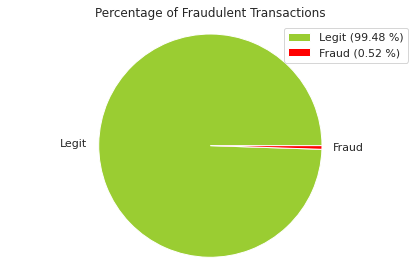

In [13]:
import matplotlib.pyplot as plt

#plt.pie(df["is_fraud"])
plt.title('Percentage of Fraudulent Transactions')
is_fraud_df = df.groupby(['is_fraud'])["is_fraud"].count()

labels = [r'Legit (99.48 %)', r'Fraud (0.52 %)']
colors = ['yellowgreen', 'red']
patches, texts = plt.pie(is_fraud_df, colors=colors,labels=["Legit","Fraud"])
plt.axis('equal')
plt.tight_layout()
plt.legend(patches, labels, loc="best")

#### Distribution by Age, Day of the Week, Time of the Day and Month

We want to answer the following questions

<ol>
    <li>
        <b>Which age groups are more susceptible to fraudulent transactions?:</b> We can see that age does play some role where we see folks in age groups 30-60 are more susceptible to fraud
    </li>
    <li>
        <b>What is the distribution between time transactions between fraudulent transactions and non-fraudulent transactions? What is the most likely time of a fraudulent transaction?:</b> We do see that Fraud is more likely to happen Late Night or Night between 8 pm - 4 am
    </li>
    <li>
        <b>What is the distribution of fraudulent and non-fraudulent transactions occurring for each day of the week (i.e., Sunday, Monday, etc.)?:</b> There isn't a lot of variation between days of the week indicating fraud is likely overall
    </li>
    <li>
        <b>Compared to any other time of the year, how prevalent are fraudulent transactions during the holidays (11-30 to 12-31)? During post-holidays (1-1 to 2-28)? During the summer (05-24 to 09-01)?:</b> We do see that Fraud is more likely to happen after major holidays such as Thanksgiving and Christmas because we see a lot in December and January
    </li>  
   
</ol>

We want to see if certain age groups are more susceptible to fraudulent transactions. 

/tmp/ipykernel_35767/294017225.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(fraud_df['txn_weekday'], rotation=90)


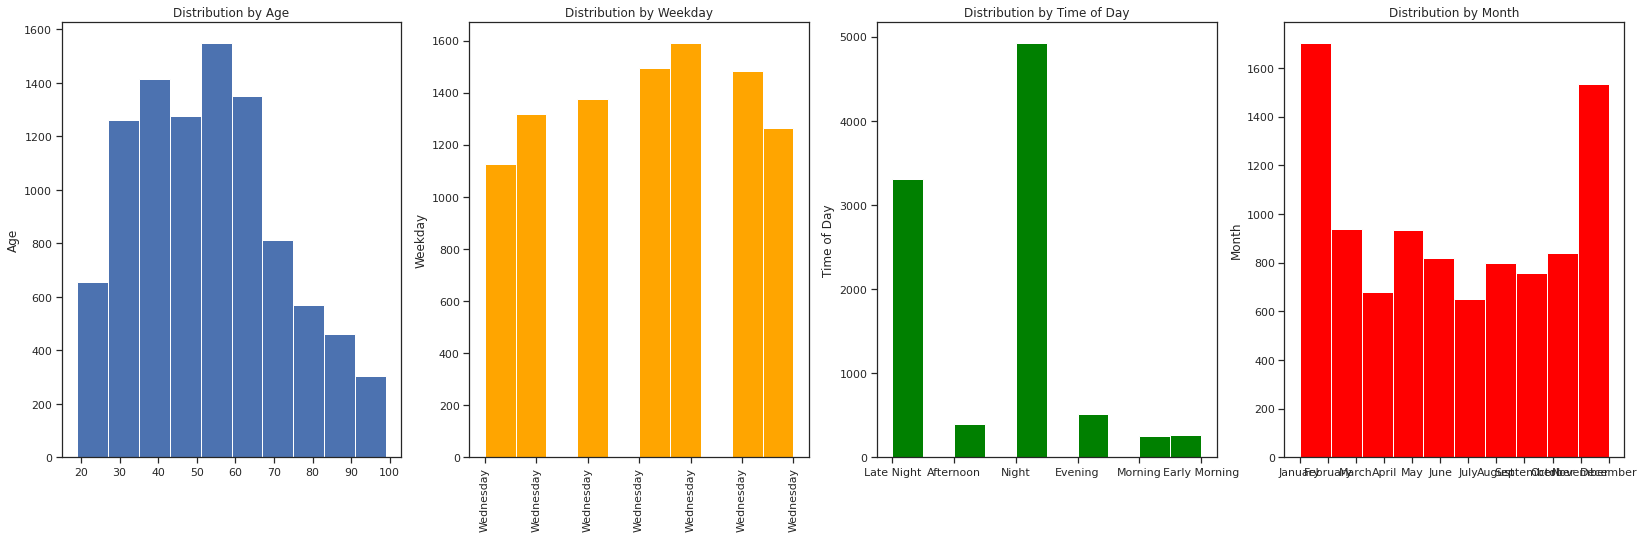

In [14]:
import matplotlib.pyplot as plt

# Get the dataframe with fraudulent transactions
fraud_df = df[df['is_fraud'] == 1] 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 8))

ax1.hist(fraud_df['age'])
ax1.set_title('Distribution by Age')
ax1.set_ylabel('Age')

ax2.hist(fraud_df['txn_weekday'],color = "orange")
ax2.set_title('Distribution by Weekday')
ax2.set_ylabel('Weekday')
ax2.set_xticklabels(fraud_df['txn_weekday'], rotation=90)

ax3.hist(fraud_df['part_of_day'],color = "green")
ax3.set_title('Distribution by Time of Day')
ax3.set_ylabel('Time of Day')

ax4.hist(fraud_df['txn_month'],color = "red")
ax4.set_title('Distribution by Month')
ax4.set_ylabel('Month')

plt.show()

We will break category down into specific indicators such as 

<ol>
    <li>
        <b>Internet Transaction</b>: Yes (1) or No (0) based on '_net' in the category
    </li>
    <li>
        <b>Type</b>: 'Shopping' based on 'shopping_' in the category or if its groceries; 'Travel' based on 'gas_transport' or 'travel' in the category; 'Home' based on 'personal_care' or 'health_fitness' or 'kids_pets' or 'home' in the category; 'Entertainment' based on 'entertainment' or 'food_dining' in the category
    </li>   
</ol>

In [15]:
def is_txn_internet(_category): 
    if (_category.endswith('_net')):
        return 1
    else:
        return 0

def normalize_category(_category): 
    if ((_category.find('shopping_')!=-1) | (_category.find('grocery_')!=-1)):
        return 'Shopping'
    elif ((_category.find('personal_care')!=-1) | (_category.find('health_fitness')!=-1) 
          | (_category.find('home')!=-1) | (_category.find('kids_pets')!=-1)):
        return 'Home'
    elif ((_category.find('entertainment')!=-1) | (_category.find('food_dining')!=-1) | 
         (_category.find('gas_')!=-1) | (_category.find('travel')!=-1)):
        return 'Entertainment'
    else:
        return 'Misc'

df['is_internet'] = df.apply(lambda x: is_txn_internet(x['category']),axis=1)
df['normalized_category'] = df.apply(lambda x: normalize_category(x['category']),axis=1)

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merchant_loc,person_loc,person,address,dob_dt,txn_dt,txn_weekday,age,txn_hour,part_of_day,txn_month,distance_from_merchant,is_internet,normalized_category
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0,36.011293-82.048315,36.0788-81.1781,"1988-03-09JenniferBanksFPsychologist, counselling",561 Perry CoveMoravian FallsNC28654,1988-03-09,2019-01-01 00:00:18,Tuesday,35,0,Late Night,January,60.118,1,Misc
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0,49.159047-118.186462,48.8878-118.2105,1978-06-21StephanieGillFSpecial educational ne...,43039 Riley Greens Suite 393OrientWA99160,1978-06-21,2019-01-01 00:00:44,Tuesday,45,0,Late Night,January,9.008,0,Shopping
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0,43.150704-112.154481,42.1808-112.262,1962-01-19EdwardSanchezMNature conservation of...,594 White Dale Suite 530Malad CityID83252,1962-01-19,2019-01-01 00:00:51,Tuesday,62,0,Late Night,January,26.391,0,Entertainment
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0,47.034331-112.561071,46.2306-112.1138,1967-01-12JeremyWhiteMPatent attorney,9443 Cynthia Court Apt. 038BoulderMT59632,1967-01-12,2019-01-01 00:01:16,Tuesday,57,0,Late Night,January,37.415,0,Entertainment
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0,38.674999-78.632459,38.4207-79.4629,1986-03-28TylerGarciaMDance movement psychothe...,408 Bradley RestDoe HillVA24433,1986-03-28,2019-01-01 00:03:06,Tuesday,37,0,Late Night,January,57.464,0,Misc


In [16]:
cat_num_counts = df.groupby(['normalized_category','is_fraud'])['is_fraud'].count() 
display(HTML(cat_num_counts.to_frame().to_html()))

In [17]:
net_num_counts = df.groupby(['is_internet','is_fraud'])['is_fraud'].count() 
display(HTML(net_num_counts.to_frame().to_html()))

In [18]:
pip install basemap-data-hires

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


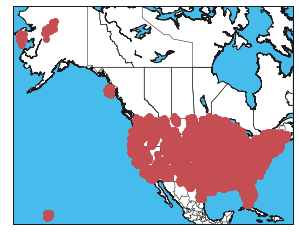

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Obtain the latitude and longitude of the merchant where the transaction occured 
lat = fraud_df['merch_lat'].values
lon = fraud_df['merch_long'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

In [20]:
state_dict = fraud_df.groupby(['state'])['state'].count().to_dict()
state_pop_dict = fraud_df.groupby(['state'])['city_pop'].sum().to_dict()
state_final_dict = {}
for key in state_dict.keys():
    val = state_dict[key]
    pop_val = state_pop_dict[key]
    state_final_dict[key] = (val / pop_val)*10000
    

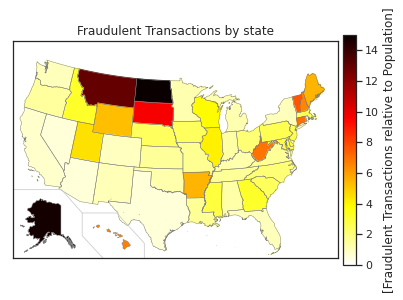

In [21]:
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 0; vmax = 15 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    short_name = list(short_state_names.keys())[list(short_state_names.values()).index(statename)]

    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        fraud_ct = state_final_dict[short_name]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # fraud), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((fraud_ct-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Fraudulent Transactions by state')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[Fraudulent Transactions relative to Population]')

plt.show()

From the above analysis (and some charts not shown here but covered in Preliminary Data Analysis) we see that fraudulent transactions are spread across customers and barring <b>Age</b> we don't see a major correlation. We also see from above that there may be a correlation between the merchant's location and customer's location (E.g. the fraud can happen from a location quite away from the customer). We get this using the <b>distance_from_merchant</b> derived attribute which then allows us to remove things like state, zip, lat, long, merch_lat and merch_long as this single attribute encodes these values

<ul>
    <li>
        <b>first</b> 
    </li>
    <li>
        <b>last</b> 
    </li>
    <li>
        <b>sex</b> 
    </li>
    <li>
        <b>dob</b> 
    </li>
    <li>
        <b>person</b> 
    </li>
    <li>
        <b>street</b> 
    </li>
    <li>
        <b>city</b> 
    </li>
    <li>
        <b>state</b> 
    </li>
    <li>
        <b>zip</b> 
    </li>
</ul>

We can also remove these columns as we have come with a normalized definition or new derived features

<ul>
    <li>
        <b>lat</b> 
    </li>
    <li>
        <b>long</b> 
    </li>
    <li>
        <b>merch_lat</b> 
    </li>
    <li>
        <b>merch_long</b> 
    </li>
    <li>
        <b>category</b> 
    </li>
    <li>
        <b>merchant</b> 
    </li>
</ul>

In [23]:
# Drop the above columns
cols_to_drop = ['cc_num','person','first','last','dob','sex','street','city','state','zip','person_loc',
                'merchant_loc','lat','long','trans_num','trans_date_trans_time','unix_time',
                'dob_dt','txn_dt','txn_hour','address','category','merch_lat','merch_long','normalized_job', 'merchant']
trimmed_df = df.drop(columns=cols_to_drop,errors='ignore')

# Drop the column with the serial number
for col in trimmed_df.columns:
    idx = df.columns.get_loc(col)
    if idx == 0:
        trimmed_df = trimmed_df.drop(columns=df.columns[idx])
    
trimmed_df.head()

,amt,city_pop,job,is_fraud,txn_weekday,age,part_of_day,txn_month,distance_from_merchant,is_internet,normalized_category
0,4.970,3495,"Psychologist, counselling",0,Tuesday,35,Late Night,January,60.118,1,Misc
1,107.230,149,Special educational needs teacher,0,Tuesday,45,Late Night,January,9.008,0,Shopping
2,220.110,4154,Nature conservation officer,0,Tuesday,62,Late Night,January,26.391,0,Entertainment
3,45.000,1939,Patent attorney,0,Tuesday,57,Late Night,January,37.415,0,Entertainment
4,41.960,99,Dance movement psychotherapist,0,Tuesday,37,Late Night,January,57.464,0,Misc


## Scaling

For all our numeric features scaling them will ensure no one feature or value gets higher weightage. We have done outlier analysis as well to make sure that MinMaxNormalization is a good scaler for all the numeric features

In [24]:
# Normalize the numeric features
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

trimmed_df[['normalized_amt']] = min_max_scaler.fit_transform(trimmed_df[['amt']])
trimmed_df[['normalized_city_pop']] = min_max_scaler.fit_transform(trimmed_df[['city_pop']])
trimmed_df[['normalized_age']] = min_max_scaler.fit_transform(trimmed_df[['age']])
trimmed_df[['normalized_distance_from_merchant']] = min_max_scaler.fit_transform(trimmed_df[['distance_from_merchant']])

trimmed_df.head()

,amt,city_pop,job,is_fraud,txn_weekday,age,part_of_day,txn_month,distance_from_merchant,is_internet,normalized_category,normalized_amt,normalized_city_pop,normalized_age,normalized_distance_from_merchant
0,4.970,3495,"Psychologist, counselling",0,Tuesday,35,Late Night,January,60.118,1,Misc,0.000,0.001,0.200,0.630
1,107.230,149,Special educational needs teacher,0,Tuesday,45,Late Night,January,9.008,0,Shopping,0.004,0.000,0.325,0.094
2,220.110,4154,Nature conservation officer,0,Tuesday,62,Late Night,January,26.391,0,Entertainment,0.008,0.001,0.537,0.277
3,45.000,1939,Patent attorney,0,Tuesday,57,Late Night,January,37.415,0,Entertainment,0.002,0.001,0.475,0.392
4,41.960,99,Dance movement psychotherapist,0,Tuesday,37,Late Night,January,57.464,0,Misc,0.001,0.000,0.225,0.602


Since we have the normalized values we can now drop the original columns where we have taken normalized values

In [25]:
cols_to_drop = ['amt','city_pop','age','distance_from_merchant']
trimmed_df = trimmed_df.drop(columns=cols_to_drop,errors='ignore')
trimmed_df.head()

,job,is_fraud,txn_weekday,part_of_day,txn_month,is_internet,normalized_category,normalized_amt,normalized_city_pop,normalized_age,normalized_distance_from_merchant
0,"Psychologist, counselling",0,Tuesday,Late Night,January,1,Misc,0.000,0.001,0.200,0.630
1,Special educational needs teacher,0,Tuesday,Late Night,January,0,Shopping,0.004,0.000,0.325,0.094
2,Nature conservation officer,0,Tuesday,Late Night,January,0,Entertainment,0.008,0.001,0.537,0.277
3,Patent attorney,0,Tuesday,Late Night,January,0,Entertainment,0.002,0.001,0.475,0.392
4,Dance movement psychotherapist,0,Tuesday,Late Night,January,0,Misc,0.001,0.000,0.225,0.602


While the problem does not ask for it at the moment since ML algorithms want numeric data we will also convert the text data from above into numeric values. Since the max values for any of these columns is 999 (for job) we will use label 

In [26]:
# Perform the transformation on a copy of the dataframe
numeric_df = trimmed_df[['normalized_amt','normalized_city_pop','normalized_age','normalized_distance_from_merchant']].copy()
numeric_df.head()

,normalized_amt,normalized_city_pop,normalized_age,normalized_distance_from_merchant
0,0.000,0.001,0.200,0.630
1,0.004,0.000,0.325,0.094
2,0.008,0.001,0.537,0.277
3,0.002,0.001,0.475,0.392
4,0.001,0.000,0.225,0.602


In [27]:
class_df = trimmed_df[['is_fraud']].copy()
categorical_df = trimmed_df[['is_internet','normalized_category','job','txn_weekday','txn_month','part_of_day']].copy()
categorical_df.head()

,is_internet,normalized_category,job,txn_weekday,txn_month,part_of_day
0,1,Misc,"Psychologist, counselling",Tuesday,January,Late Night
1,0,Shopping,Special educational needs teacher,Tuesday,January,Late Night
2,0,Entertainment,Nature conservation officer,Tuesday,January,Late Night
3,0,Entertainment,Patent attorney,Tuesday,January,Late Night
4,0,Misc,Dance movement psychotherapist,Tuesday,January,Late Night


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to category
ohc_category = OneHotEncoder()
ohe_category= ohc_category.fit_transform(categorical_df['normalized_category'].values.reshape(-1,1)).toarray()
df_category = pd.DataFrame(ohe_category, columns = ohc_category.categories_[0])
df_category.head()

,Entertainment,Home,Misc,Shopping
0,0.000,0.000,1.000,0.000
1,0.000,0.000,0.000,1.000
2,1.000,0.000,0.000,0.000
3,1.000,0.000,0.000,0.000
4,0.000,0.000,1.000,0.000


In [29]:
from sklearn.preprocessing import OrdinalEncoder

# Fix the order for body types
ordered_part_of_day = ['Late Night','Early Morning', 'Morning','Afternoon','Evening','Night']

# Create the Ordinal Encoder
oe_daypart = OrdinalEncoder(categories=[ordered_part_of_day])

part_of_day_df = categorical_df[['part_of_day']].copy()
part_of_day_df[['part_of_day']] = oe_daypart.fit_transform(part_of_day_df[['part_of_day']])
part_of_day_df.head()

,part_of_day
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000


In [30]:
# Fix the order for months
ordered_month = ['January','February', 'March','April','May','June','July','August','September',
                      'October','November','December']

# Create the Ordinal Encoder
oe_month = OrdinalEncoder(categories=[ordered_month])

month_df = categorical_df[['txn_month']].copy()
month_df[['txn_month']] = oe_month.fit_transform(month_df[['txn_month']])
month_df.head()

,txn_month
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000


In [31]:
# Fix the order for months
ordered_weekday = ['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']

# Create the Ordinal Encoder
oe_weekday = OrdinalEncoder(categories=[ordered_weekday])

weekday_df = categorical_df[['txn_weekday']].copy()
weekday_df[['txn_weekday']] = oe_weekday.fit_transform(weekday_df[['txn_weekday']])
weekday_df.head()

,txn_weekday
0,2.000
1,2.000
2,2.000
3,2.000
4,2.000


In [32]:
from sklearn.preprocessing import LabelEncoder

# Create instance of labelencoder
labelencoder = LabelEncoder()

job_df = categorical_df[['job']].copy()
job_df['job_enc'] = labelencoder.fit_transform(job_df['job'])

cols_to_drop = ['job']
job_df = job_df.drop(columns=cols_to_drop,errors='ignore')
job_df.head()

,job_enc
0,372
1,431
2,308
3,330
4,116


## Feature and Label Selection
Down select from your data, the input features and label(s)

In [33]:
# Concatenate all the dataframes
fraud_features_df = pd.concat([job_df, df_category, weekday_df, month_df, part_of_day_df, numeric_df], axis=1)
fraud_features_df.head()

,job_enc,Entertainment,Home,Misc,Shopping,txn_weekday,txn_month,part_of_day,normalized_amt,normalized_city_pop,normalized_age,normalized_distance_from_merchant
0,372,0.000,0.000,1.000,0.000,2.000,0.000,0.000,0.000,0.001,0.200,0.630
1,431,0.000,0.000,0.000,1.000,2.000,0.000,0.000,0.004,0.000,0.325,0.094
2,308,1.000,0.000,0.000,0.000,2.000,0.000,0.000,0.008,0.001,0.537,0.277
3,330,1.000,0.000,0.000,0.000,2.000,0.000,0.000,0.002,0.001,0.475,0.392
4,116,0.000,0.000,1.000,0.000,2.000,0.000,0.000,0.001,0.000,0.225,0.602


In [34]:
# With the above we now have our key features which is all columns minus is_fraud and this will be X 
X = fraud_features_df.values
y = class_df.values.ravel()

print(X.shape)
print(y.shape)

(1852394, 12)
(1852394,)


## Split into 3 data sets for training, validation, and test (Explain your % for each)

We are going to make use of train_test_split twice to get the Training, Validation and Test Datasets. The default values for this function is 75% training and 25% Testing. We will go with 80 and 20 instead just because we need a larger percentage in training since we will split it further to get our validation. 

We will also use stratified=y because this dataset is highly unbalanced i.e. the fraudulent transactions are small percentage of the overall transactions and hence we want to make sure that proporition is maintained in each of our splits

In [35]:
# Split
from sklearn.model_selection import train_test_split

# Get the range 
x_ids = list(range(len(X)))

# Obtain training and test dataset 
x_train_ids, x_val_ids, y_train,y_val  = train_test_split(x_ids, y , test_size = 0.3, stratify=y, random_state=0)

# Obtain training and validation dataset
x_val_ids, x_test_ids, y_val, y_test = train_test_split(x_val_ids, y_val , test_size = 0.5, stratify=y_val, random_state=0)


In [36]:
# We now extract using the indices
X_train = X[x_train_ids]
X_val = X[x_val_ids]
X_test = X[x_test_ids]

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

rf_clf = RandomForestClassifier(warm_start=True, max_depth=11, n_estimators=100, max_features=12, random_state=42)
rf_clf.fit(X_train, y_train)

# Increase estimators and add more data
rf_clf.n_estimators += 100
rf_clf.fit(X_val, y_val)

RandomForestClassifier(max_depth=11, max_features=12, n_estimators=200,
                       random_state=42, warm_start=True)

In [48]:
from sklearn.metrics import balanced_accuracy_score

# Initialize Metric Arrays 
acc,precision, recall, f1, roc_auc = [], [], [], [], []

# Measure on Training Data
y_pred = rf_clf.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

precision       += [precision_score(y_train, y_pred)]
recall          += [recall_score(y_train, y_pred)]
f1              += [f1_score(y_train, y_pred)]
roc_auc         += [roc_auc_score(y_train, y_pred)]
acc             += [balanced_accuracy_score(y_train, y_pred)]

# Measure on Validation Data
y_pred = rf_clf.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

precision       += [precision_score(y_val, y_pred)]
recall          += [recall_score(y_val, y_pred)]
f1              += [f1_score(y_val, y_pred)]
roc_auc         += [roc_auc_score(y_val, y_pred)]
acc             += [balanced_accuracy_score(y_val, y_pred)]

# Measure on Test Data
y_pred = rf_clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

precision       += [precision_score(y_test, y_pred)]
recall          += [recall_score(y_test, y_pred)]
f1              += [f1_score(y_test, y_pred)]
roc_auc         += [roc_auc_score(y_test, y_pred)]
acc             += [balanced_accuracy_score(y_test, y_pred)]

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(warm_start=True, n_estimators=100, max_features=12, learning_rate=0.1,max_depth=11, random_state=42)
gb_clf.fit(X_train, y_train)

# Increase estimators and add more data
gb_clf.n_estimators += 100
gb_clf.fit(X_val, y_val)

GradientBoostingClassifier(max_depth=11, max_features=12, n_estimators=200,
                           random_state=42, warm_start=True)

In [49]:
# Measure on Training Data
y_pred = gb_clf.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

precision       += [precision_score(y_train, y_pred)]
recall          += [recall_score(y_train, y_pred)]
f1              += [f1_score(y_train, y_pred)]
roc_auc         += [roc_auc_score(y_train, y_pred)]
acc             += [balanced_accuracy_score(y_train, y_pred)]

# Measure on Validation Data
y_pred = gb_clf.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

precision       += [precision_score(y_val, y_pred)]
recall          += [recall_score(y_val, y_pred)]
f1              += [f1_score(y_val, y_pred)]
roc_auc         += [roc_auc_score(y_val, y_pred)]
acc             += [balanced_accuracy_score(y_val, y_pred)]

# Measure on Test Data
y_pred = gb_clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

precision       += [precision_score(y_test, y_pred)]
recall          += [recall_score(y_test, y_pred)]
f1              += [f1_score(y_test, y_pred)]
roc_auc         += [roc_auc_score(y_test, y_pred)]
acc             += [balanced_accuracy_score(y_test, y_pred)]

In [43]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [50]:
# Measure on Training Data
y_pred = nb_clf.predict(X_train)
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

precision       += [precision_score(y_train, y_pred)]
recall          += [recall_score(y_train, y_pred)]
f1              += [f1_score(y_train, y_pred)]
roc_auc         += [roc_auc_score(y_train, y_pred)]
acc             += [balanced_accuracy_score(y_train, y_pred)]

# Measure on Validation Data
y_pred = nb_clf.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

precision       += [precision_score(y_val, y_pred)]
recall          += [recall_score(y_val, y_pred)]
f1              += [f1_score(y_val, y_pred)]
roc_auc         += [roc_auc_score(y_val, y_pred)]
acc             += [balanced_accuracy_score(y_val, y_pred)]

# Measure on Test Data
y_pred = nb_clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

precision       += [precision_score(y_test, y_pred)]
recall          += [recall_score(y_test, y_pred)]
f1              += [f1_score(y_test, y_pred)]
roc_auc         += [roc_auc_score(y_test, y_pred)]
acc             += [balanced_accuracy_score(y_test, y_pred)]

In [51]:
# Collect all the metrics by classifier to compare
classifiers = ['Random Forest', '', '', 'Gradient Boosted', '','', 'Naive Bayes', '','']
metrics_datasets = ['Training', 'Validation', 'Test','Training', 'Validation', 'Test','Training', 'Validation', 'Test']

model_stats = np.column_stack((classifiers, metrics_datasets, acc, f1, roc_auc, precision, recall))
model_stats_df = pd.DataFrame(model_stats, columns = ['Classifier','Dataset','Accuracy','F1 Score',
                                                        'ROC AUC Score', 'Precision', 'Recall'])
display(HTML(model_stats_df.to_html()))  

,Classifier,Dataset,Accuracy,F1 Score,ROC AUC Score,Precision,Recall
0,Random Forest,Training,0.8378167745237565,0.7750530335171829,0.8378167745237565,0.9081328295883874,0.67599171107164
1,,Validation,0.8575315734379299,0.8149606299212598,0.85753157343793,0.9469350411710887,0.7152729785763648
2,,Test,0.8347222574229214,0.7634789452971271,0.8347222574229214,0.8874656907593779,0.669889502762431
3,Gradient Boosted,Training,0.9026920602407138,0.7955325206219431,0.9026920602407138,0.7848192424024197,0.8065423327412671
4,,Validation,0.9258296017780056,0.8794579172610557,0.9258296017780056,0.9086219602063376,0.8521078092605391
5,,Test,0.8098509447383492,0.6298110566829951,0.8098509447383492,0.6382978723404256,0.6215469613259669
6,Naive Bayes,Training,0.7267086350033487,0.3937889779814179,0.7267086350033487,0.3453895958919402,0.45796329188869156
7,,Validation,0.7391989265925675,0.4067500727378528,0.7391989265925675,0.3512562814070352,0.48306841741534207
8,,Test,0.7321513683673255,0.3989424206815511,0.7321513683673255,0.34713701431492844,0.46892265193370164


In [52]:
rslt_df = df[df['is_fraud'] == 1] 
rslt_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merchant_loc,person_loc,person,address,dob_dt,txn_dt,txn_weekday,age,txn_hour,part_of_day,txn_month,distance_from_merchant,is_internet,normalized_category
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.060,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.995,-81.727,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430,-81.179,1,36.430124-81.17948299999999,35.9946-81.7266,1988-09-15JasonMurphyMSoil scientist,542 Steve Curve Suite 011CollettsvilleNC28611,1988-09-15,2019-01-02 01:06:37,Wednesday,35,1,Late Night,January,38.058,0,Shopping
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.520,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440,-98.459,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819,-99.143,1,29.819364-99.142791,29.44-98.459,1960-10-28MistyHartFHorticultural consultant,27954 Hall Mill Suite 575San AntonioTX78208,1960-10-28,2019-01-02 01:47:29,Wednesday,63,1,Late Night,January,47.406,0,Entertainment
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.310,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440,-98.459,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273,-98.836,1,29.273085-98.83636,29.44-98.459,1960-10-28MistyHartFHorticultural consultant,27954 Hall Mill Suite 575San AntonioTX78208,1960-10-28,2019-01-02 03:05:23,Wednesday,63,3,Late Night,January,26.126,0,Shopping
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.030,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.995,-81.727,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909,-82.091,1,35.909292-82.09101,35.9946-81.7266,1988-09-15JasonMurphyMSoil scientist,542 Steve Curve Suite 011CollettsvilleNC28611,1988-09-15,2019-01-02 03:38:03,Wednesday,35,3,Late Night,January,25.187,0,Entertainment
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.730,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.440,-98.459,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786,-98.683,1,29.786426-98.68341,29.44-98.459,1960-10-28MistyHartFHorticultural consultant,27954 Hall Mill Suite 575San AntonioTX78208,1960-10-28,2019-01-02 03:55:47,Wednesday,63,3,Late Night,January,15.907,0,Shopping


# Summary & Quality Check

Overall this data had sufficient information in terms of number of customers, geographical spread, types of merchants & categories and proportion of fraudulent data vs valid data across all these dimensions. The data had extremely good quality and hence it is good for machine learning ingestion. Using stratified split of training, validation and test data we are able to get a 60, 20 & 20 split for training, validation and testing maintaining the 0.52% ratio of fraudulent transactions. 

<ul>
     <li>
         <b>Overall Quality of the data: </b> None of the columns had any missing or null values. The dates in Date of Birth were valid. Statistically the States and Zip codes are also valid. So overall the quality of the data is good
    </li>
    <li>
         <b>Sufficient amount of the data: </b> There are 1.85M records and so there is sufficient amount of data in terms of rows
    </li>
    <li>
         <b>Sparseness of any data categories (eg. no young adults): </b> This a very unbalanced dataset when looked at from a target variable stand point. There are only 0.5% fraudulent transactions. Having said that this is function of the domain i.e. in general the fraudulent transactions form a small percentage of the overall transactions and so it is not uncommon to see this. Within this data we see a good distribution of data amongst geos (states, zip codes, etc), customers, merchants and categories. We use the histograms to arrive at this conclusion. 
    </li>
    <li>
         <b>Trustworthiness of the data (Is it true?): </b> This is something we cannot verify and hence the biggest cons of this data. Given that the data has no missing values, does not have any outliers makes this suspect - it is likely that this is synthentic data. Real world data often has missing values, outliers, skewed distributions, etc 
    </li>
    <li>
         <b>Timeliness of the data (is it recent?)  What might be the problem if it is not?: </b> Given we are in 2024 this data is now a bit dated since it covers period between 2019 and 2020. Fraudulent actors are constantly changing how they commit fraud and so if we base our model on dated data we are not going to see it work well in the field. 
    </li>
    <li>
         <b>Note difficenties: </b> There were duplicate pieces of information such as transaction date time as well as unix timestamps as well as customer identification number and the pieces of information that can identify a customer uniquely. 
    </li>
    <li>
         <b>Available document on the data types, how the data was collected, how it was verified?: </b> The data was obtained from the Assignment Module 2 Content https://jhu.instructure.com/courses/66217/pages/case-study-transaction-fraud-detection?module_item_id=3574620. The description of the fields here was well explained and enabled removing redundant pieces of information. The only challenge is understanding which features (after removing rendundant columns) are still likely to be relevant. For example are elements of a customer's identity (E.g. Sex, DOB, Job), Address (Zip, State, City, Street), Where the transaction occured at the merchant (Lat, Long) might be influencing the chances of the transaction being fraudulent
    </li>
</ul>
